In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd 
import plotly.express as px

First, let's read data in to DataFrame

In [2]:
smoothed_rate_df = pd.read_csv('./Data/smoothed_rate_df.csv')

In [3]:
total_percent_df = pd.read_csv('./Data/total_percent_df.csv')

In [4]:
_2019_df = pd.read_csv('Data/2019_df.csv')

## Question 1: 
Sự khác biệt giữa các nhóm dân tộc: Tỷ lệ này khác nhau như thế nào giữa các nhóm dân tộc khác nhau? Có sự khác biệt đáng kể về tỷ lệ giữa các nhóm dân tộc?

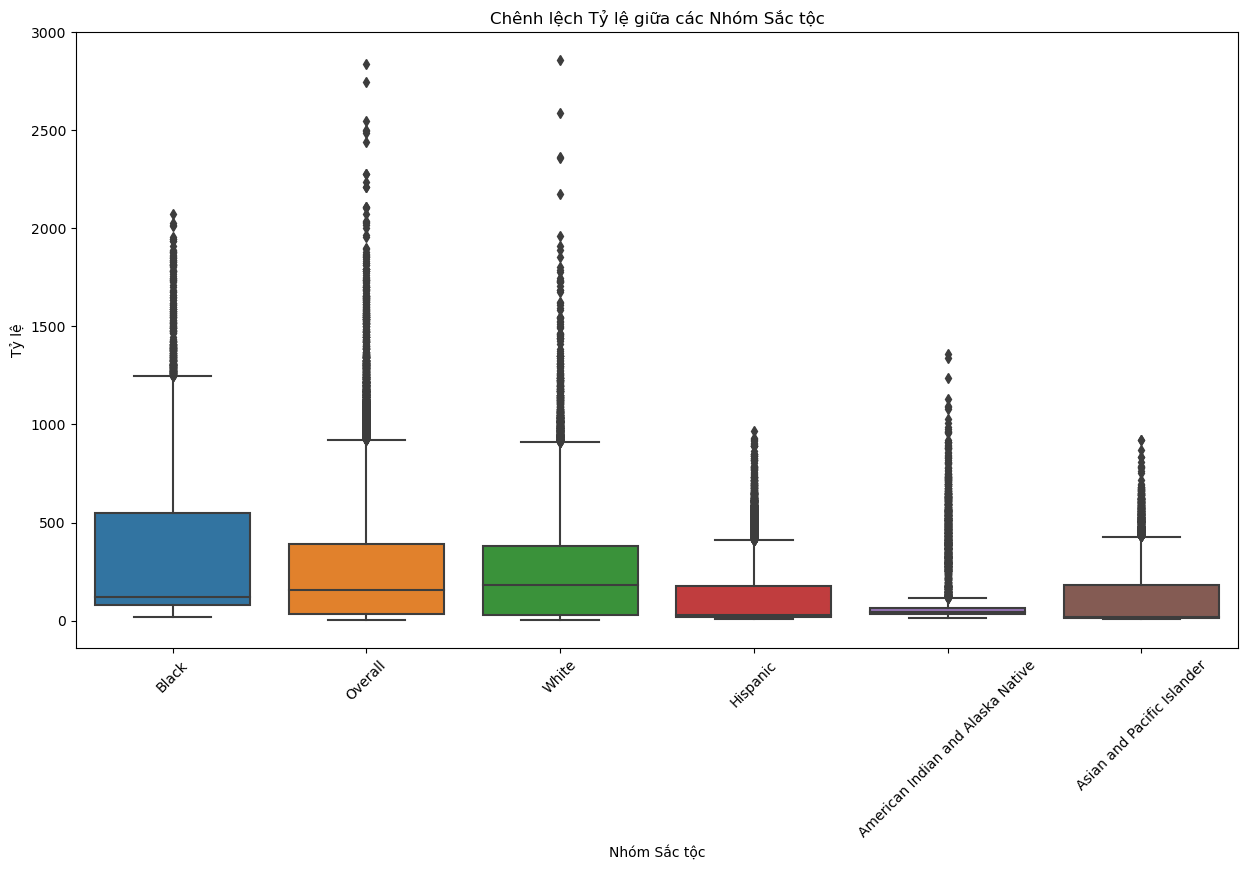

In [5]:
# Đặt kích thước biểu đồ
plt.figure(figsize=(15, 8))

# Vẽ biểu đồ boxplot cho sự chênh lệch giữa các nhóm sắc tộc và độ tuổi
sns.boxplot(x='race/ethnicityage_group', y='data_value', data=smoothed_rate_df)

# Đặt tiêu đề và nhãn trục
plt.title('Chênh lệch Tỷ lệ giữa các Nhóm Sắc tộc')
plt.xlabel('Nhóm Sắc tộc')
plt.ylabel('Tỷ lệ')

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.show()

In [6]:
group_stats = smoothed_rate_df.groupby('race/ethnicityage_group')['data_value'].describe()
group_stats

,count,mean,std,min,25%,50%,75%,max
race/ethnicityage_group,,,,,,,,
American Indian and Alaska Native,6260.0,100.642444,155.028866,13.3,32.6,42.80,65.90,1359.3
Asian and Pacific Islander,10480.0,96.427586,144.417575,6.1,14.7,18.80,180.40,922.1
Black,35760.0,309.248115,317.167526,19.0,80.8,118.80,547.15,2072.6
Hispanic,21100.0,107.764024,152.844262,7.8,20.6,27.40,177.00,965.7
Overall,298082.0,227.562356,222.689259,4.0,31.5,155.30,388.10,2837.0
White,101000.0,223.108285,216.929488,3.1,28.8,181.85,381.40,2857.9


**Comments:**
Dựa vào Box Plots và group_stats trên, ta rút ra được:

- **Tỷ lệ Nhóm Mắc Bệnh:**
  - Nhóm White có tỷ lệ mắc bệnh cao nhất.
  - Nhóm Asian and Pacific Islander có tỷ lệ mắc bệnh thấp nhất.
  - Nhóm Black có sự biến động lớn và tỷ lệ mắc bệnh cao.

- **Biến Động:**
  - Nhóm Black có sự biến động nhiều nhất.
  - Nhóm Overall và White có sự tương đồng trong box plot, thể hiện sự ổn định hơn.

- **Phân Bố Lệch Phải:**
  - Hầu hết các box plot đều có phân bố lệch phải, cho thấy có một số cá nhân có mức độ mắc bệnh cao.

- **Outliers:**
  - Các nhóm đều có nhiều outliers ở phía trên, nhưng nhóm Overall và White có số lượng outliers cao nhất.

**Lợi Ích:**
- Hiểu rõ hơn về biến động và phân phối của dữ liệu trong từng nhóm sắc tộc.
- Đưa ra những hướng điều trị và quản lý sức khỏe có thể được tối ưu hóa cho từng nhóm.
- Cung cấp thông tin quan trọng để định hình chính sách y tế cộng đồng, đặc biệt là trong việc giảm chênh lệch sức khỏe giữa các nhóm.

## Question2:
Có tỷ lệ thay đổi nào theo độ tuổi từ năm 2000-2010 so với năm 2010-2019?
Có sự chênh lệch đáng kể giữa các nhóm độ tuổi không?

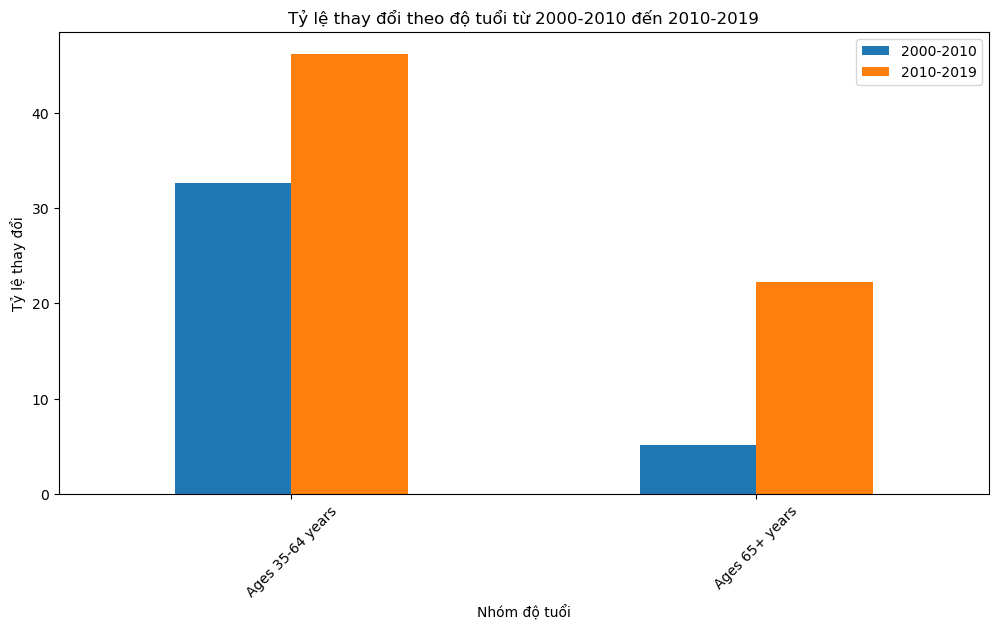

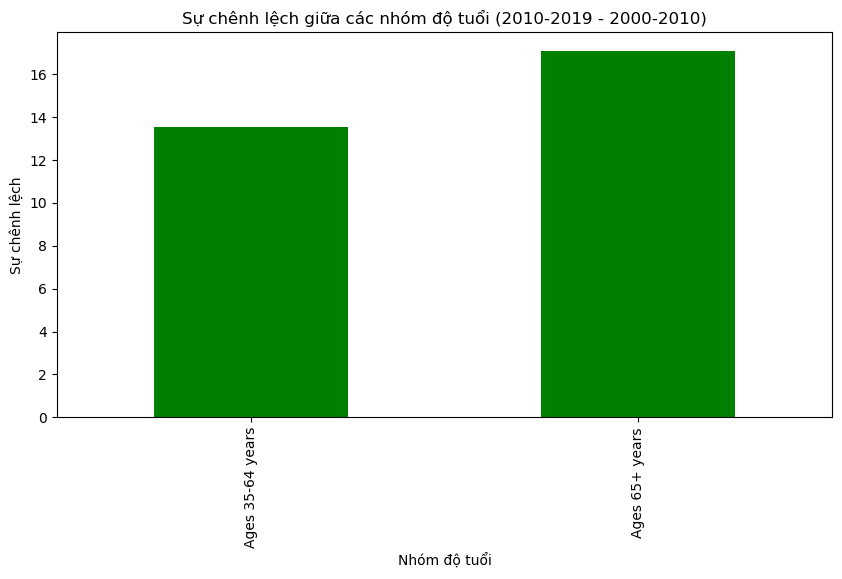

In [7]:
# Tính tỷ lệ thay đổi theo độ tuổi từ năm 2000-2010 đến năm 2010-2019
change_by_age_group = total_percent_df.groupby(['age_group', 'year']).agg({'data_value': 'mean'}).unstack()

# Tính sự chênh lệch giữa các nhóm độ tuổi
age_group_diff = change_by_age_group['data_value']['2010-2019'] - change_by_age_group['data_value']['2000-2010']

# Vẽ biểu đồ tỷ lệ thay đổi theo độ tuổi
change_by_age_group.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Tỷ lệ thay đổi theo độ tuổi từ 2000-2010 đến 2010-2019')
plt.xlabel('Nhóm độ tuổi')
plt.ylabel('Tỷ lệ thay đổi')
plt.legend(['2000-2010', '2010-2019'])
plt.show()

# Vẽ biểu đồ sự chênh lệch giữa các nhóm độ tuổi
age_group_diff.plot(kind='bar', figsize=(10, 5), color=['red' if x < 0 else 'green' for x in age_group_diff])
plt.title('Sự chênh lệch giữa các nhóm độ tuổi (2010-2019 - 2000-2010)')
plt.xlabel('Nhóm độ tuổi')
plt.ylabel('Sự chênh lệch')
plt.show()

**Comment**:

**Thay Đổi Theo Nhóm Tuổi (Change by Age Group):**

- Nhóm Tuổi "Ages 35-64 years": Tăng từ 32.62 (2000-2010) lên 46.16 (2010-2019), đây là một sự tăng trưởng đáng kể (13.53492).
- Nhóm Tuổi "Ages 65+ years": Tăng từ 5.13 (2000-2010) lên 22.23 (2010-2019), cũng là một sự tăng đáng kể và thấm chí còn tăng nhiều hơn so với nhóm tuổi trên (17.10542).

**Tổng Quan:**

- Xu hướng tăng trên cả hai nhóm tuổi, đặc biệt là nhóm tuổi 65+ nổi bật với mức tăng cao hơn.

**Cảm Nhận Tổng Quan:**

- Dữ liệu cho thấy tăng lên khá nhiều của bệnh lý tim mạch trong khoảng thời gian sau năm 2010.

**Lợi Ích:**

- Tổng hợp thông tin trên giúp xác định các nhóm có rủi ro cao và đề xuất chiến lược phòng ngừa và quản lý đặc biệt cho từng đối tượng.
- Cung cấp cơ sở cho việc đưa ra chính sách y tế cộng đồng nhằm giảm chênh lệch sức khỏe giữa các nhóm tuổi.
- Hỗ trợ quyết định chiến lược và nguồn lực cho các biện pháp phòng ngừa và điều trị toàn diện.

## Question 3:
Sự thay đổi về số ca tử vong theo năm đối với nhóm người trên 65 tuổi

In [8]:
df = smoothed_rate_df[(smoothed_rate_df['sex'] == 'Overall') & (smoothed_rate_df['race/ethnicityage_group'] == 'Overall') & (smoothed_rate_df['age_group'] == 'Ages 65+ years')]
df_gr = df.groupby('year').agg({'data_value': 'mean'}).reset_index()
df_gr

,year,data_value
0,2000,384.991250
1,2001,394.457229
2,2002,407.807998
3,2003,425.237739
4,2004,420.315096
5,2005,432.671611
6,2006,412.206121
7,2007,410.447503
8,2008,412.795531
9,2009,397.117987


C:\Users\Admin\AppData\Local\Temp\ipykernel_856\2570856870.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='data_value', data=df, marker='o', ci=None)


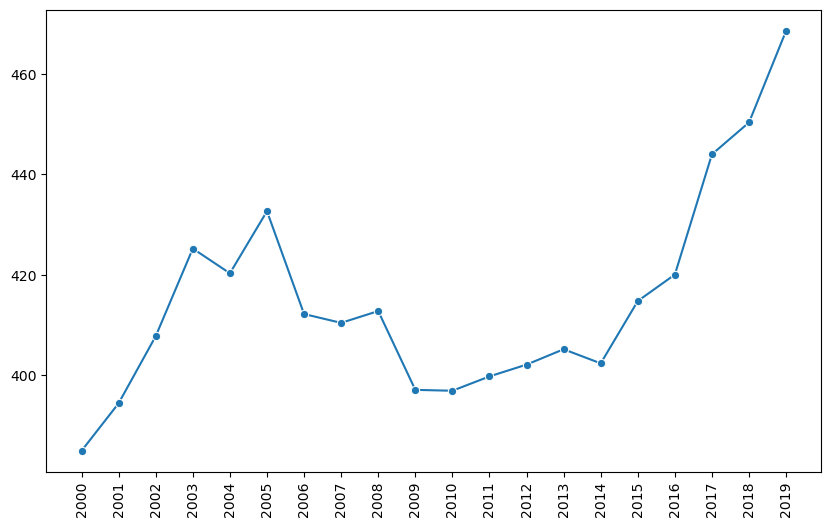

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='data_value', data=df, marker='o', ci=None)
plt.xticks(df['year'].unique(), rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.show()

**Comment:** Dựa vào Line graph và df_gr, ta rút ra được:
- **Xu hướng biểu đồ:**
  - Biểu đổ có xu hướng đi lên vào các giai đoạn 2003-2005 và 2016-2019.
  - Biểu đồ có xu hướng giảm vào giai đoạn 2009-2010.
  - Biểu đồ bình ổn vào giai đoạn 2010-2015.
- **Gia tăng mạnh vào thời điểm hiện tại:**
  - So với giai đoạn đạt đỉnh trước đó thì năm gần đây nhất là 2019 có giá trị cao đáng kể.  

**Lợi ích:**
- Phân tích tình hình xu hướng những năm gần đây có những ảnh hưởng gì dẫn tới sự tăng mạnh của data_value.
- Tìm hiểu những lý do giúp các năm 2009, 2010 có data_value đạt đáy để áp dụng.

## Question 4:
Top 10 địa điểm có sự thay đổi hàng đầu từ giai đoạn 2000-2010 sang giai đoạn 2010-2019

In [10]:
# Tính top 10 
avg_data_value = total_percent_df.groupby(['locationdesc', 'year'])['data_value'].mean().reset_index()
top_10_locations = avg_data_value.groupby('locationdesc')['data_value'].mean().nlargest(10).index
filtered_data = total_percent_df[total_percent_df['locationdesc'].isin(top_10_locations)]


In [11]:
filtered_data

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
2300,5063,2000-2010,AR,Independence,Ages 35-64 years,Overall,Female,-91.570247,35.741672,68.1,9.5,137.9
2301,5063,2010-2019,AR,Independence,Ages 35-64 years,Overall,Female,-91.570247,35.741672,235.4,110.4,393.9
2302,5063,2000-2010,AR,Independence,Ages 35-64 years,Overall,Male,-91.570247,35.741672,76.8,19.7,160.9
2303,5063,2010-2019,AR,Independence,Ages 35-64 years,Overall,Male,-91.570247,35.741672,244.9,152.7,398.7
2304,5063,2000-2010,AR,Independence,Ages 35-64 years,Overall,Overall,-91.570247,35.741672,74.7,19.9,143.9
...,...,...,...,...,...,...,...,...,...,...,...,...
36774,40151,2010-2019,OK,Woods,Ages 65+ years,Overall,Male,-98.863518,36.766741,181.9,99.4,281.7
36775,40151,2000-2010,OK,Woods,Ages 65+ years,Overall,Overall,-98.863518,36.766741,101.7,25.0,236.1
36776,40151,2010-2019,OK,Woods,Ages 65+ years,Overall,Overall,-98.863518,36.766741,158.4,76.1,232.3
36777,40151,2000-2010,OK,Woods,Ages 65+ years,White,Overall,-98.863518,36.766741,104.6,27.0,246.9


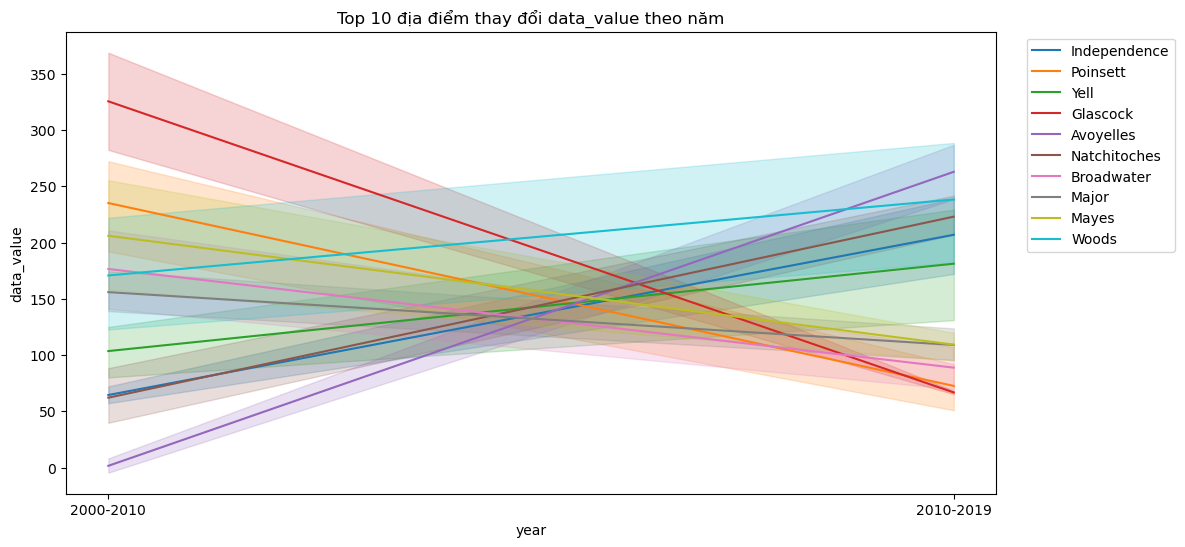

In [12]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='year', y='data_value', hue='locationdesc', data=filtered_data)
plt.title('Top 10 địa điểm thay đổi data_value theo năm')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

**Comments:**
- **Xu hướng giảm:**
    - Các khu vực top đầu ở giai đoạn 2000-2010 có sự giảm vào giai đoạn 2010-2019, là: Glascock, Poinsett, Mayes, Broadwater, Major.
    - Xu hướng giảm mạnh, giảm từ gấp rưỡi đến gấp đôi về data_value.
- **Xu hướng tăng:**
    - Các khu vực top cuối ở giai đoạn 2000-2010 lại có sự tăng vào giai đoạn 2010-2019, ví dụ như: Avoyelles, Woods, Independence, Yell, Natchitoches. 
    - Xu hướng tăng mạnh, tăng gấp rưỡi thậm chí hàng chục lần.

**Lợi ích:**
- Nguyên cứu nguyên nhân, chính sách hỗ trợ tại các khu vực có sự giảm để áp dụng.
- Tìm hiểu lý do các khu vực gia tăng mạnh để có các biện pháp, chính sách hỗ trợ thích hợp.

## Question 5:
Phân tích tình trạng số ca tử vong giữa nam và nữ ở Autauga, Alabama (35-64 tuổi)

In [13]:
df_filtered = smoothed_rate_df[(smoothed_rate_df['age_group'] == 'Ages 35-64 years') & (smoothed_rate_df['locationdesc'] == 'Autauga')]

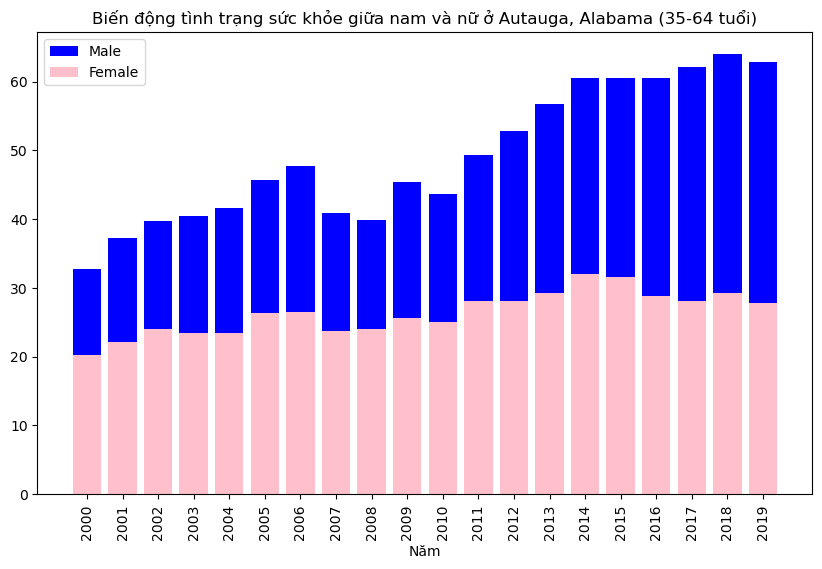

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df_filtered[df_filtered['sex'] == 'Male']['year'], df_filtered[df_filtered['sex'] == 'Male']['data_value'], color='blue', label='Male')
plt.bar(df_filtered[df_filtered['sex'] == 'Female']['year'], df_filtered[df_filtered['sex'] == 'Female']['data_value'], color='pink', label='Female')

plt.xticks(df_filtered['year'].unique(), rotation=90)

plt.title('Biến động tình trạng sức khỏe giữa nam và nữ ở Autauga, Alabama (35-64 tuổi)')
plt.xlabel('Năm')
plt.legend()

plt.show()

**Comments:**
- **Tổng số ca:**
    - Tổng số ca tử vong có xu hướng tăng lên theo các năm. Cho thấy tình trạng bệnh cộng đồng đang tăng.
- **Tỷ lệ nam nữ:**
    - Tỷ lệ bệnh nam nữ đang chuyển dịch, từ nữ giới chiếm phần lớn dần thành nghiêng về nam giới, là dấu hiệu của sự biến động mạnh mẽ về tình trạng sức khỏe giữa hai giới.

**Lợi ích:**
- Sự thay đổi có thể thể hiện những thay đổi trong cộng đồng về lối sống, công việc, sinh hoạt,… của cả hai giới.
- Trực quan hóa dữ liệu dựa trên địa điểm (Autauga, Alabama) cung cấp thông tin rõ ràng về tình hình sức khỏe trong cộng đồng địa phương. Giúp xác định các vấn đề ưu tiên đối với sức khỏe nam giới và nguyên nhân giúp giảm sức khỏe phụ nữ để ứng dụng rộng rãi.

## Question 6:
So sánh tỷ lệ tử vong giữa dân số da trắng và da đen ở Autauga, Alabama

In [15]:
autauga_df = total_percent_df[total_percent_df['locationdesc'] == 'Autauga']
autauga_df

,locationid,year,locationabbr,locationdesc,age_group,race/ethnicityage_group,sex,x_long,y_lat,data_value,confidence_limit_low,confidence_limit_high
0,1001,2000-2010,AL,Autauga,Ages 35-64 years,Black,Overall,-86.642959,32.535306,-7.5,-37.7,31.7
1,1001,2010-2019,AL,Autauga,Ages 35-64 years,Black,Overall,-86.642959,32.535306,2.6,-25.8,31.2
2,1001,2000-2010,AL,Autauga,Ages 35-64 years,Overall,Female,-86.642959,32.535306,17.1,-19.8,73.5
3,1001,2010-2019,AL,Autauga,Ages 35-64 years,Overall,Female,-86.642959,32.535306,8.3,-19.1,62.1
4,1001,2000-2010,AL,Autauga,Ages 35-64 years,Overall,Male,-86.642959,32.535306,19.7,-10.2,98.0
5,1001,2010-2019,AL,Autauga,Ages 35-64 years,Overall,Male,-86.642959,32.535306,41.9,5.5,77.2
7,1001,2000-2010,AL,Autauga,Ages 35-64 years,Overall,Overall,-86.642959,32.535306,18.9,-10.3,77.2
8,1001,2010-2019,AL,Autauga,Ages 35-64 years,Overall,Overall,-86.642959,32.535306,28.4,-1.8,64.4
9,1001,2000-2010,AL,Autauga,Ages 35-64 years,White,Overall,-86.642959,32.535306,27.1,-11.6,128.2
10,1001,2010-2019,AL,Autauga,Ages 35-64 years,White,Overall,-86.642959,32.535306,38.2,0.7,90.9


In [16]:
# Lọc dữ liệu cho nhóm người da trắng và nhóm người da đen
white_df = autauga_df[autauga_df['race/ethnicityage_group'] == 'White']
black_df = autauga_df[autauga_df['race/ethnicityage_group'] == 'Black']

In [17]:
# Lọc dữ liệu theo giai đoạn 2000-2010 và 2010-2019
period_2000_2010_df = autauga_df[autauga_df['year'] == '2000-2010']
period_2010_2019_df = autauga_df[autauga_df['year'] == '2010-2019']

In [18]:
# Tính tỷ lệ tử vong cho từng nhóm
white_death_rate_2000_2010 = period_2000_2010_df[period_2000_2010_df['race/ethnicityage_group'] == 'White']['data_value'].values[0]
white_death_rate_2010_2019 = period_2010_2019_df[period_2010_2019_df['race/ethnicityage_group'] == 'White']['data_value'].values[0]

In [19]:
black_death_rate_2000_2010 = period_2000_2010_df[period_2000_2010_df['race/ethnicityage_group'] == 'Black']['data_value'].values[0]
black_death_rate_2010_2019 = period_2010_2019_df[period_2010_2019_df['race/ethnicityage_group'] == 'Black']['data_value'].values[0]

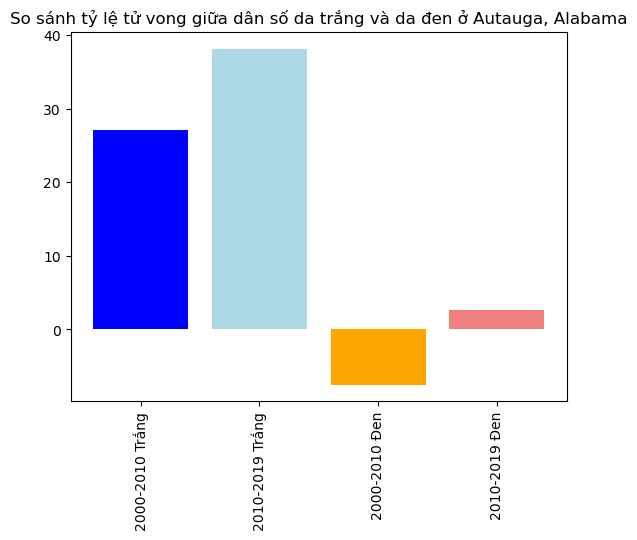

In [20]:
# Hiển thị kết quả so sánh
labels = ['2000-2010 Trắng', '2010-2019 Trắng', '2000-2010 Đen', '2010-2019 Đen']
death_rates = [white_death_rate_2000_2010, white_death_rate_2010_2019, black_death_rate_2000_2010, black_death_rate_2010_2019]

plt.bar(labels, death_rates, color=['blue', 'lightblue', 'orange', 'lightcoral'])
plt.title('So sánh tỷ lệ tử vong giữa dân số da trắng và da đen ở Autauga, Alabama')
plt.xticks(rotation=90, ha="center")  
plt.show()

**Comments:**
- **Nhóm người da trắng:**
    - Nhóm người da trắng có sự tăng trưởng trong giai đoạn 2000-2010 qua giai đoạn 2010-2019.
- **Nhóm người da đen:**
    - Nhóm người da đen cũng có sự tăng trưởng nhẹ trong từ 2 giai đoạn đó. 
    - Nhóm người da đen vào giai đoạn 2000-2010 có giá trị âm biểu thị giai đoạn 2000-2010 thấp hơn rất nhiều so với giai đoạn trước đó.
- **So sánh chung:**
    - Chênh lệch giữa người da trắng và da đen khá đáng kể, biểu thị màu da có ảnh hưởng đáng kể đến khả năng mắc bệnh.
  
**Lợi ích:**  
- Phân tích sự biến động trong tỷ lệ tử vong theo thời gian cho các nhóm dân tộc cụ thể giúp theo dõi xu hướng sức khỏe trong cộng đồng và xác định xem có sự cải thiện hay không.
- So sánh tỷ lệ tử vong giữa các dân tộc giúp xác định chênh lệch sức khỏe giữa các nhóm, từ đó làm cơ sở cho các nghiên cứu chi tiết hơn để xác định nguyên nhân và các yếu tố cho từng nhóm, từ đó có các chính sách để cải thiện sức khỏe cộng đồng.

## Question 7:
Số người bị đột quỵ phân bố như thế nào trong các bang đối với nhóm người phụ nữ - da trắng?

In [21]:
df_Female_White= _2019_df[(_2019_df['sex'] == 'Female') & (_2019_df['race/ethnicityage_group'] == 'White')]

In [22]:
df_Female_White = df_Female_White[['locationabbr', 'locationdesc','y_lat', 'x_lon', 'data_value']]
df_Female_White_gr = df_Female_White.groupby('locationabbr').agg({'y_lat': 'first', 'x_lon': 'first', 'data_value': 'mean'}).reset_index()
df_Female_White_gr.head(5)

,locationabbr,y_lat,x_lon,data_value
0,AK,55.442393,-161.959930,181.333333
1,AL,32.539426,-86.641296,354.176471
2,AR,34.291259,-91.367868,340.700000
3,AS,-14.301754,-170.719474,NaN
4,AZ,35.394866,-109.486870,228.775000


In [23]:
# Tạo custom color scale từ màu đỏ nhạt đến màu đỏ đậm
custom_scale = [
    [0, 'rgb(255, 255, 255)'],  # Màu trắng cho giá trị nhỏ
    [150 / df_Female_White_gr['data_value'].max(), 'rgb(255, 230, 230)'],  # Màu đỏ nhạt cho giá trị < 200
    [1, 'rgb(255,0,0)']  # Màu đỏ đậm cho giá trị > 150
]

fig = px.choropleth(   
    df_Female_White_gr,
    color=df_Female_White_gr['data_value'],
    locations=df_Female_White_gr['locationabbr'],
    locationmode="USA-states",
    scope="usa",
    color_continuous_scale=custom_scale,
    range_color=[df_Female_White_gr['data_value'].min(), df_Female_White_gr['data_value'].max()],  # Đảm bảo mọi giá trị đều được hiển thị
    hover_name=df_Female_White_gr['locationabbr'],
    title='Phân bố ca bệnh theo các bang của nước Mỹ',
    width=1000,
    height=600,
)

fig.show()

**Comments:**
- **Phân bố:**
    - Tổng số ca tử vong phân bố không đồng đều.
    - Tập trung hầu hết ở phía đông nam.

**Lợi ích:**
- Khoanh vùng có số ca tử vong cao để tập trung nguồn lực và chính sách hỗ trợ.
- Phân tích nguyên nhân, lý do các vùng có số ca tử vong thấp để áp dụng rộng rãi.